<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [25]:
import pandas as pd

Load the dataset into a dataframe.


In [26]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [50]:
df[['ConvertedComp']]

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


/Users/xavienaguigui/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

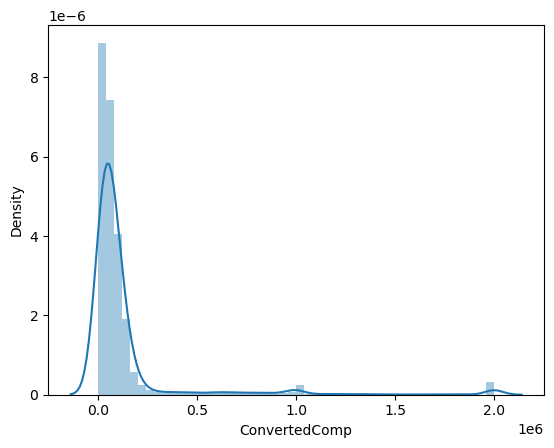

In [8]:
# your code goes here
import seaborn as sns
sns.distplot(df['ConvertedComp'], kde = True)

Plot the histogram for the column `ConvertedComp`.


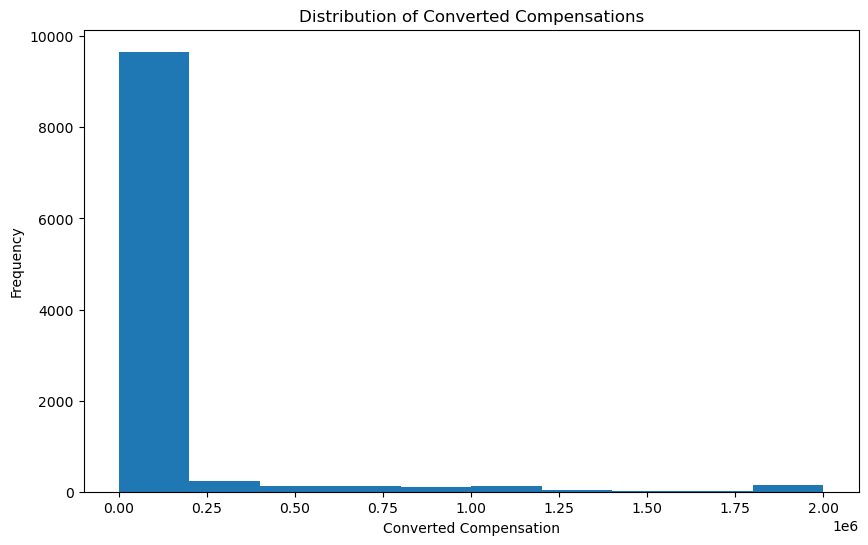

In [52]:
# your code goes here
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(df['ConvertedComp'])
ax.set_title('Distribution of Converted Compensations')
ax.set_xlabel('Converted Compensation')
ax.set_ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [53]:
# your code goes here
df['ConvertedComp'].dropna(axis = 0, inplace = True)
print("The ConvertedComp Median is", df['ConvertedComp'].median())

The ConvertedComp Median is 57745.0


How many responders identified themselves only as a **Man**?


In [54]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [13]:
# your code goes here
df_woman = df[df['Gender']=='Woman']
print("The median of responders identified only as a Woman are", df_woman['ConvertedComp'].median())

The median of responders identified only as a Woman are 57708.0


Give the five number summary for the column `Age`?


**click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [14]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


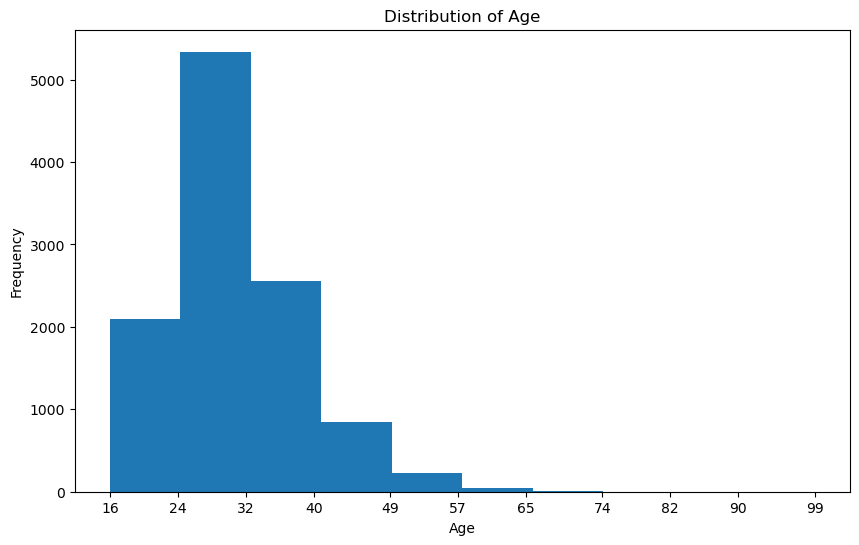

In [57]:
# your code goes here
fig, ax = plt.subplots(figsize = (10,6))
count = ax.hist(df['Age'])

ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_xticks(list(map(int,count[1])))
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


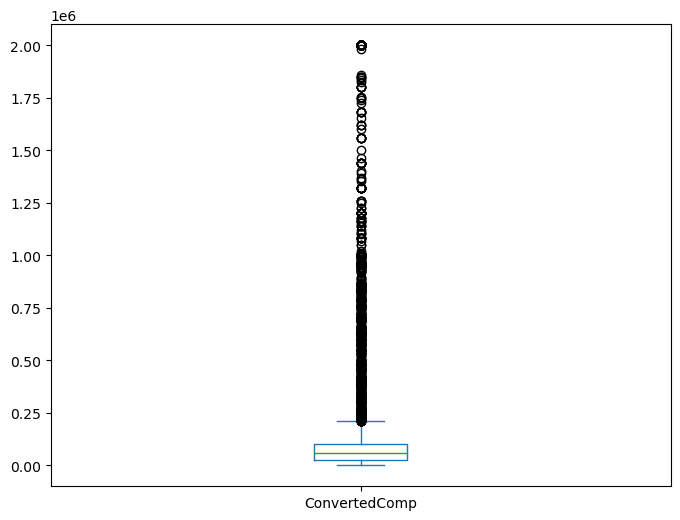

In [16]:
# your code goes here
df_cv = pd.DataFrame(data = df['ConvertedComp'])
df_cv.plot(kind = 'box', figsize = (8,6))
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [17]:
# your code goes here
df['ConvertedComp'].dropna(axis = 0, inplace = True)
Q1,Q3 = df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)
IQR = Q3 - Q1
print('The Inter Quartile range for ConvertedComp is', IQR)

The Inter Quartile range for ConvertedComp is 73132.0


Find out the upper and lower bounds.


In [18]:
# your code goes here
upper = Q3 + (IQR*1.5)
lower = Q1 - (IQR*1.5)

print('The Upper Bound is', upper)
print('The Lower Bound is', lower)

The Upper Bound is 209698.0
The Lower Bound is -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# your code goes here
(df['ConvertedComp']<lower)| (df['ConvertedComp']>upper)

0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [61]:
# your code goes here
df2 = df['ConvertedComp'].clip(lower,upper)
df2.describe()
df2.median()

57745.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [21]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
